# DISTRIBUTIONAL ANALYSIS REPORT

Name-Rajrishi Sarkar,Roll-203110061

# Data description

In [ ]:
Metallic Glass Descriptors:

	Relevant papers:
		There is no paper published on this data set at the present time.  The data was assembled
		primarily by Vanessa Nilsen under the guidance of Prof. Dane Morgan at UW Madison
		 (ddmorgan@wisc.edu).
		A previous study of reduced glass transition temperature as a GFA descriptor can be found in reference [5]:
		https://www.sciencedirect.com/science/article/pii/S0022309300000648
		
	X features:
		The metallic glass dataset gives two columns with information about the material
		Composition. The first is the overall composition, and the second is the highest
		Composition element. The columns from four to the end are the MAGPIE features that
		have been generated from the material composition column and give values such as
		properties averaged over the material composition as well as features that are only for 
		the majority element in each alloy [3]. The majority element features are labelled as 
		"site1".
		
	Y property:
		The reduced glass transition temperature (Trg) has historically been used as a rough 
		predictor for Glass Forming Ability (GFA). By making a model to predict Trg for an 
		arbitrary alloy, it could be possible to use these values to estimate GFA directly, or as 
		input for another model to then predict GFA.

# Importing dataset

In [1]:
data<-read.csv("C:\\Users\\ADMIN\\Desktop\\data for data analysis\\stats project\\features.csv")
df<-as.data.frame(data)
#viewing the datset
head(df)

Material.compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,...,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
Ag10Cu35Zr55,Zr,0.534,0.57906932,-0.5856000,1.0298821,1.0298821,0.5895359,0.2175710,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag10Cu50Zr40,Cu,0.608,0.74840145,-0.5856000,1.0298821,1.0298821,1.1762502,0.6539689,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag10Cu55Zr35,Cu,0.609,0.80484550,-0.5856000,1.0298821,1.0298821,1.3718216,0.7994348,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag20Cu40Zr40,Cu,0.577,0.82197318,-0.5856000,1.0298821,1.0298821,1.1762502,0.6539689,0.563915,...,0.4738515,0.8578491,0.2645033,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Ag35Ca65,Ca,0.515,-0.86099185,-0.5856000,-0.9989612,-0.9989612,-0.4372142,-0.6136631,-1.684370,...,1.0059113,0.8578491,-1.7450349,1.091651,-0.8870769,-0.4544714,0.718014,0.718014,1.317680,-0.8849937
Al13.3Co26.7Zr60,Zr,0.573,0.05888908,0.4642294,0.6147495,0.6147495,-0.6479424,-0.5920510,0.563915,...,-0.3242381,-1.1657062,-0.7402658,-1.139306,1.5622891,-0.5844290,-1.392731,-1.392731,-1.106354,1.5750435


In [2]:
dim(df)

[1] 585  23

# loading the packages

In [21]:
load.libraries <- c('fitdistrplus', 'logspline','actuar')
install.lib <- load.libraries[!load.libraries %in% installed.packages()]
for(libs in install.lib) install.packages(libs, dependences = TRUE)
sapply(load.libraries, require, character = TRUE)


also installing the dependency 'expint'



package 'expint' successfully unpacked and MD5 sums checked
package 'actuar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ADMIN\AppData\Local\Temp\RtmpEfuIHC\downloaded_packages


Loading required package: actuar
Warning message:
"package 'actuar' was built under R version 3.6.3"
Attaching package: 'actuar'

The following object is masked from 'package:grDevices':

    cm



fitdistrplus    logspline       actuar 
        TRUE         TRUE         TRUE

**Lets analyze the distribution of each of the features one by one**

# 1) Glass forming temperature (target)

**visualizing the skew kurtosis plot**

summary statistics
------
min:  0.223   max:  0.688 
median:  0.584 
mean:  0.577388 
estimated sd:  0.04834414 
estimated skewness:  -1.759822 
estimated kurtosis:  10.12794 

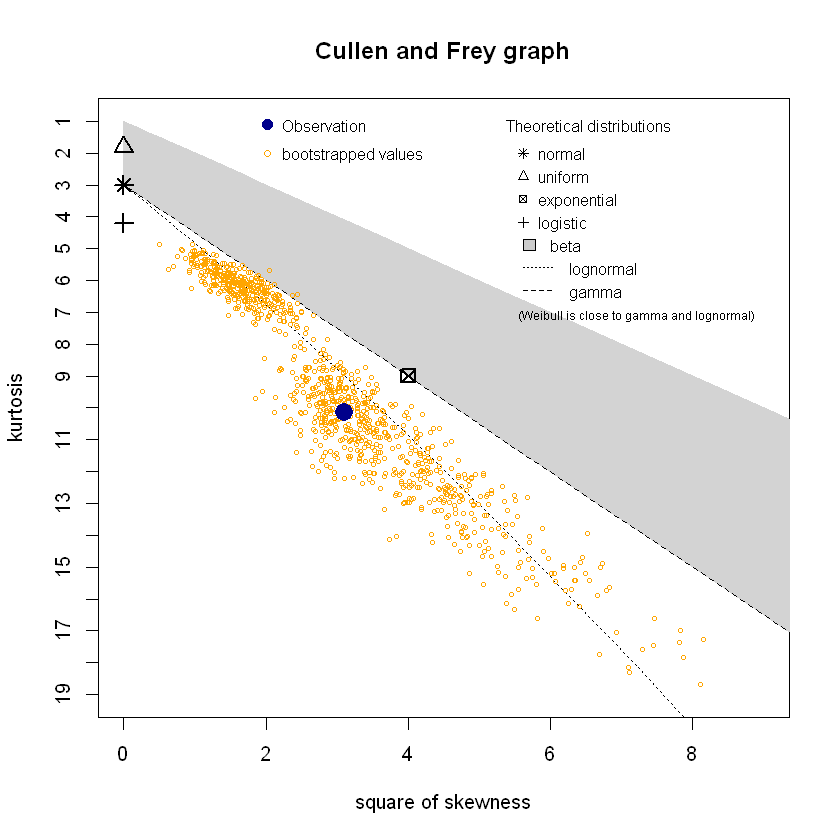

In [15]:
descdist(df$Trg, discrete = FALSE,boot=1000)

 **the observation lies below the lognormal curve, we will try to fit the distributions to the data**

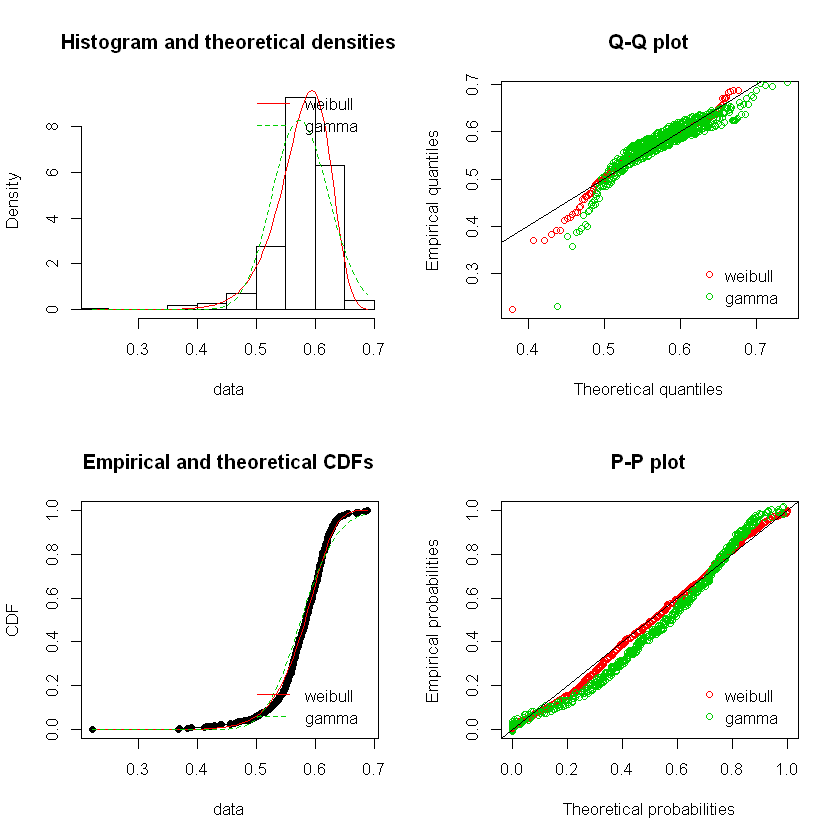

In [16]:
fw <- fitdist(df$Trg, "weibull")
fg <- fitdist(df$Trg , "gamma",method="mme")
par(mfrow = c(2, 2))
plot.legend <- c( "weibull","gamma")
denscomp(list(fw, fg), legendtext = plot.legend)
qqcomp(list(fw, fg), legendtext = plot.legend)
cdfcomp(list(fw, fg), legendtext = plot.legend)
ppcomp(list(fw, fg), legendtext = plot.legend)

 both the distributions seem to fit pretty good
**comparing the AIC values of both the distributions**

1. WEIBULL DIST(AIC)=-2004.26
2. GAMMA DIS(AIC)=-1794.17
due to low AIC gamma dist is a better fit for the target feature


# 2) Density composition average

**cullen frey plot**

summary statistics
------
min:  -2.296437   max:  4.418691 
median:  0.1412969 
mean:  1.709401e-12 
estimated sd:  1.000856 
estimated skewness:  0.2426468 
estimated kurtosis:  4.387157 

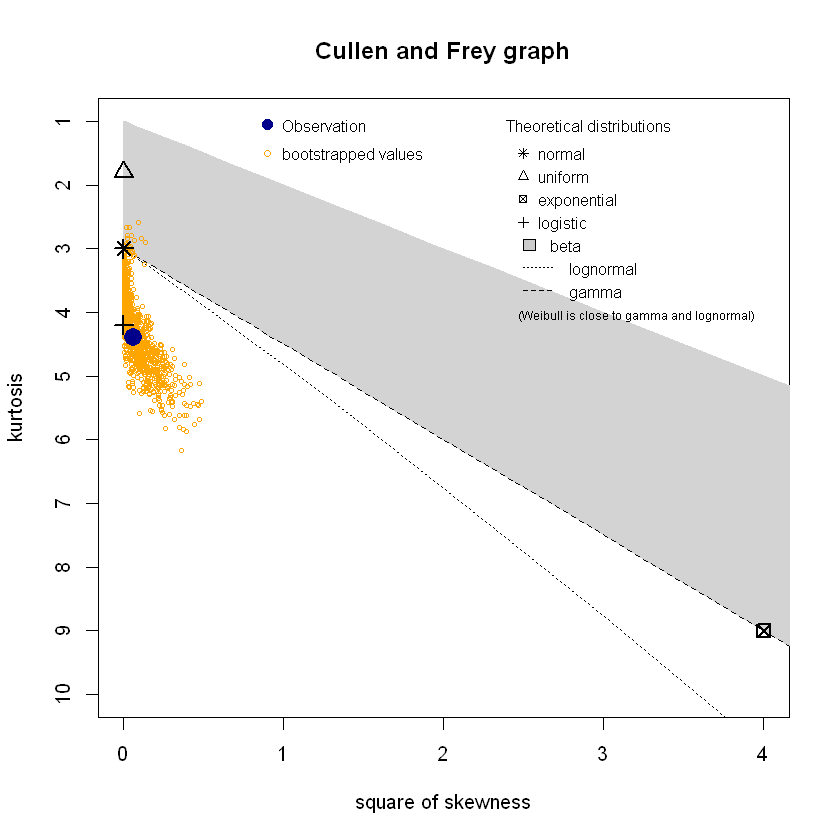

In [19]:
descdist(df$Density_composition_average, discrete = FALSE,boot=1000)

the observation lies near the logistic distribution point and some bootstrap samples also lies near normal dist

**fitting the distributions**

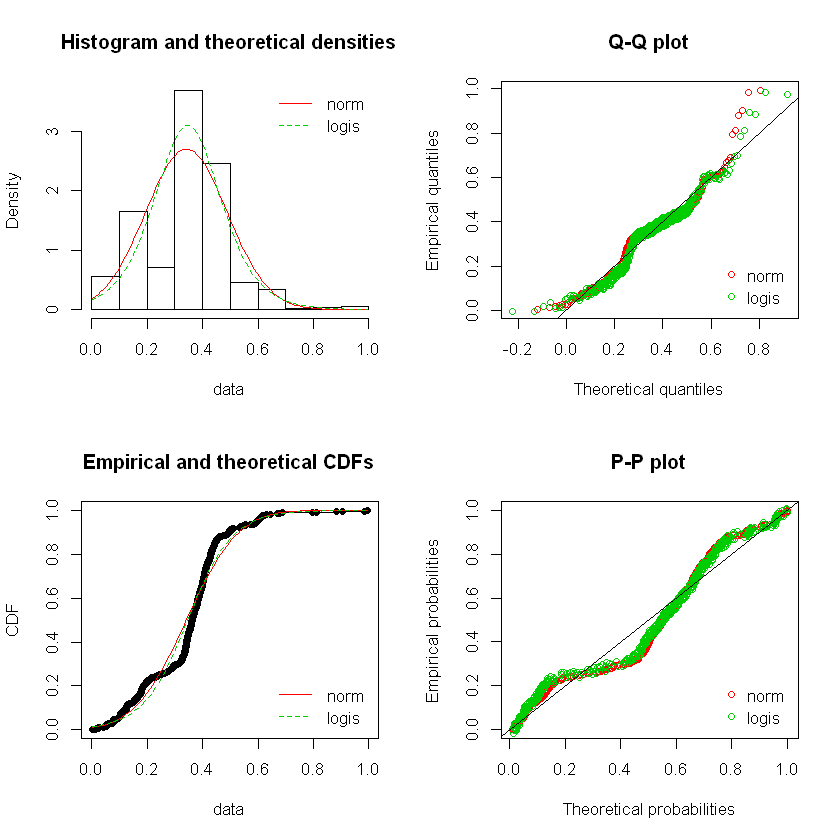

In [106]:
x <- df$Density_composition_average
fn<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "norm")
flg <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "logis")
par(mfrow = c(2, 2))
plot.legend <- c( "norm","logis")
denscomp(list(fn,flg), legendtext = plot.legend)
qqcomp(list(fn,flg), legendtext = plot.legend)
cdfcomp(list(fn,flg), legendtext = plot.legend)
ppcomp(list(fn,flg), legendtext = plot.legend)

**choosing the better fit**

In [107]:
fn$aic
flg$aic

[1] -575.5884

[1] -596.4935

LOGISTIC DISTRIBUTION is a better fit judging by the aic values

# 3) IsBoron composition average

**cullen frey plot**

summary statistics
------
min:  -0.5856   max:  6.479041 
median:  -0.5856 
mean:  3.589747e-11 
estimated sd:  1.000856 
estimated skewness:  3.714128 
estimated kurtosis:  22.47165 

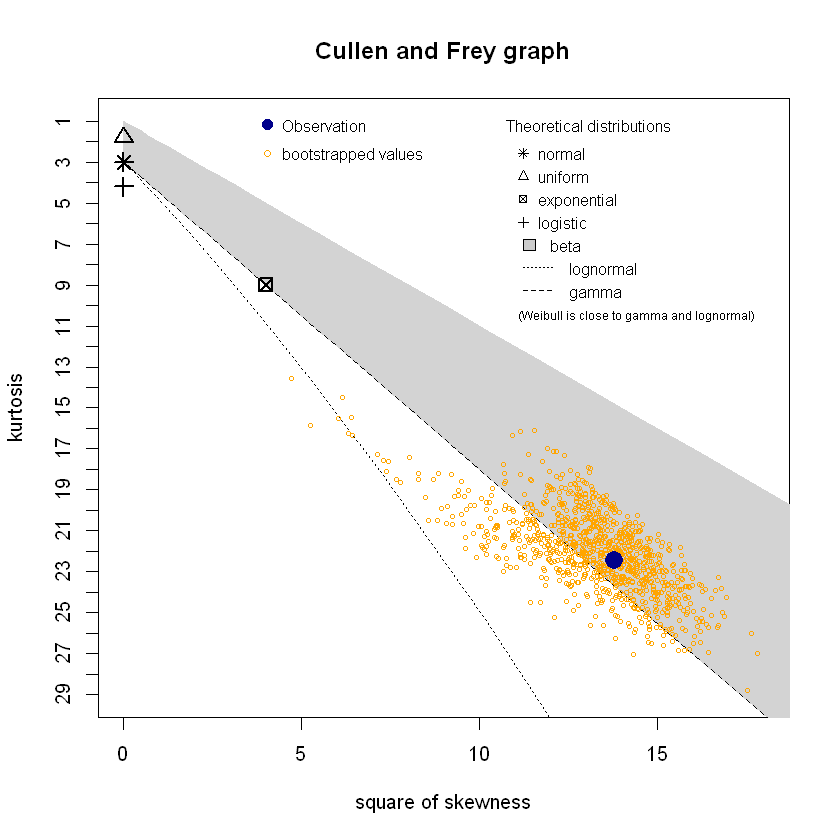

In [36]:
descdist(df$IsBoron_composition_average, discrete = FALSE,boot=1000)

the observation clearly falls under the beta distribution

**fitting distributions**

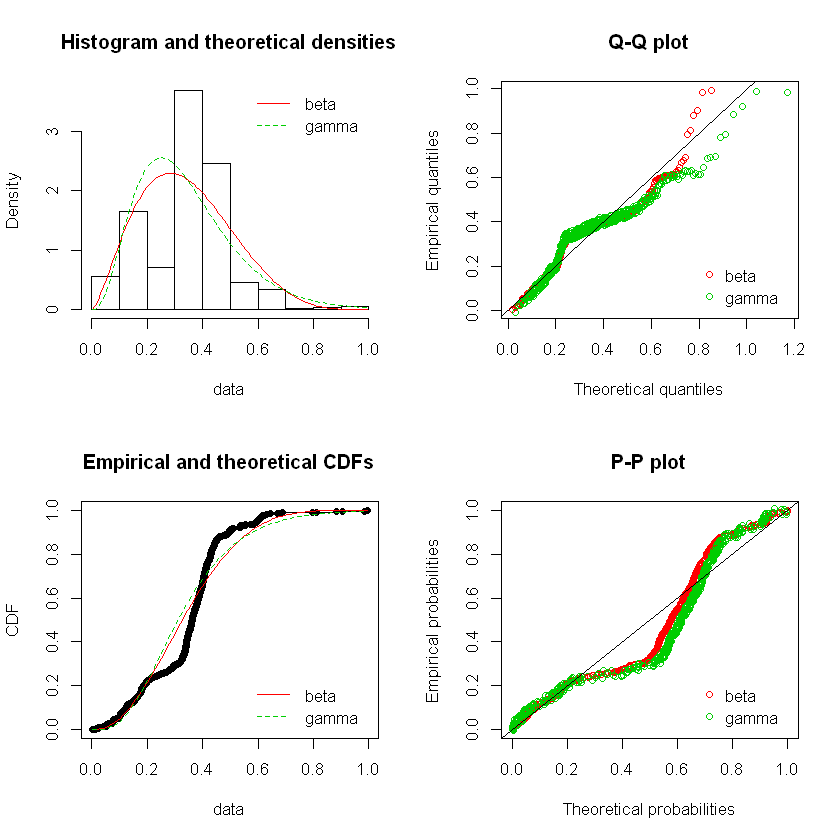

In [108]:
x <- df$Density_composition_average
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
fg <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "gamma")
par(mfrow = c(2, 2))
plot.legend <- c( "beta","gamma")
denscomp(list(fb,fg), legendtext = plot.legend)
qqcomp(list(fb,fg), legendtext = plot.legend)
cdfcomp(list(fb,fg), legendtext = plot.legend)
ppcomp(list(fb,fg), legendtext = plot.legend)

**choosing the best fit**

In [109]:
fb$aic
fg$aic

[1] -499.9934

[1] -475.5853

judging from the aic values BETA DISTRIBUTION is suitable for this particular distribution

# 4) IsDBlock composition average

**cullen frey plot**

summary statistics
------
min:  -2.091415   max:  1.029882 
median:  0.3744096 
mean:  1.36752e-11 
estimated sd:  1.000856 
estimated skewness:  -0.6624578 
estimated kurtosis:  1.828959 

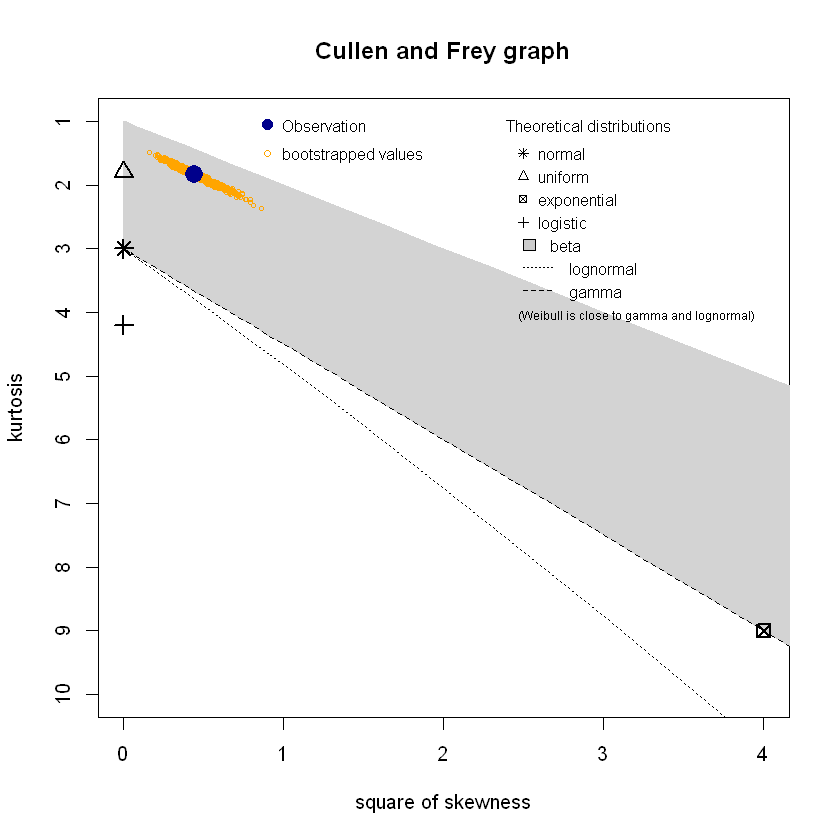

In [51]:
descdist(df$IsDBlock_composition_average, discrete = FALSE,boot=1000)

**fitting beta distribution**

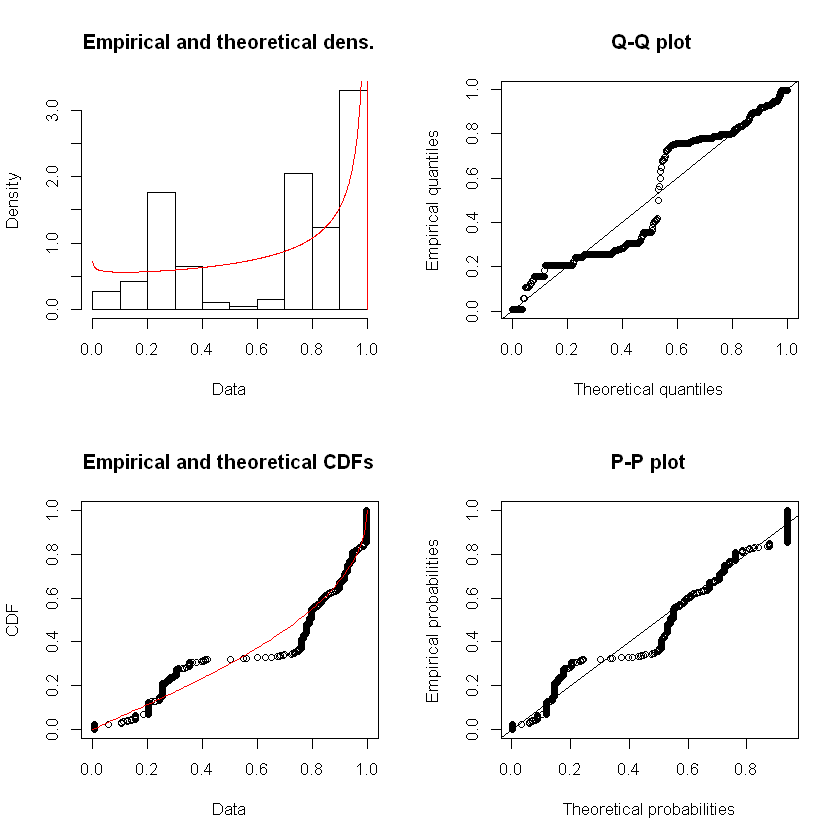

In [110]:
x <- df$IsDBlock_composition_average
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
plot(fb)

# 5) IsTransitionMetal composition average

**cullen frey plot**

summary statistics
------
min:  -2.091415   max:  1.029882 
median:  0.3744096 
mean:  1.36752e-11 
estimated sd:  1.000856 
estimated skewness:  -0.6624578 
estimated kurtosis:  1.828959 

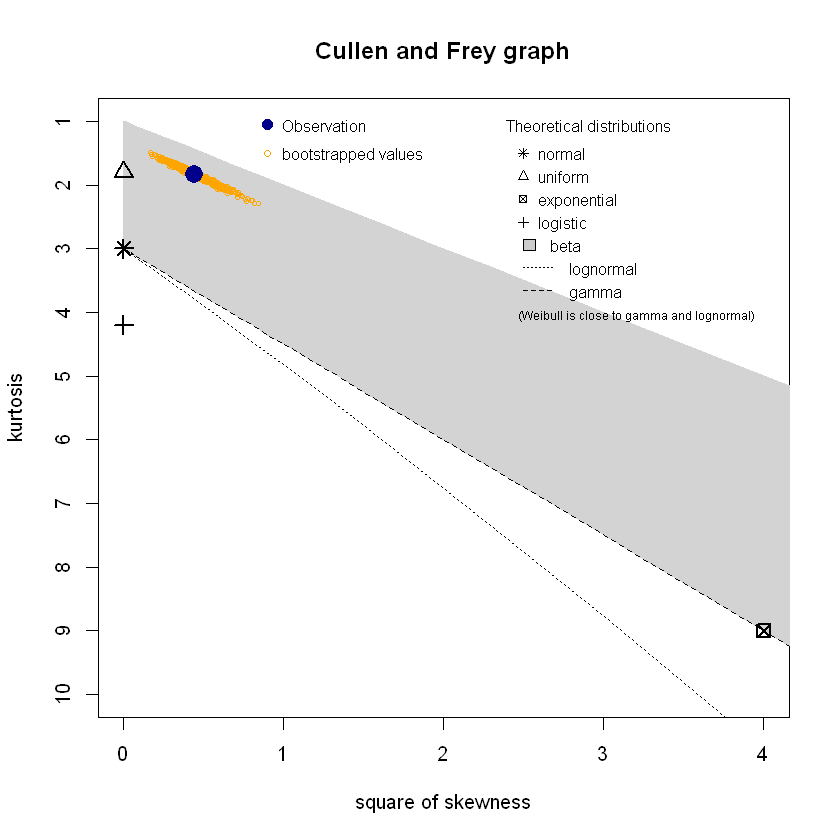

In [52]:
descdist(df$IsTransitionMetal_composition_average, discrete = FALSE,boot=1000)

the feature seems to fit the beta distribution

**fitting to beta distribution**

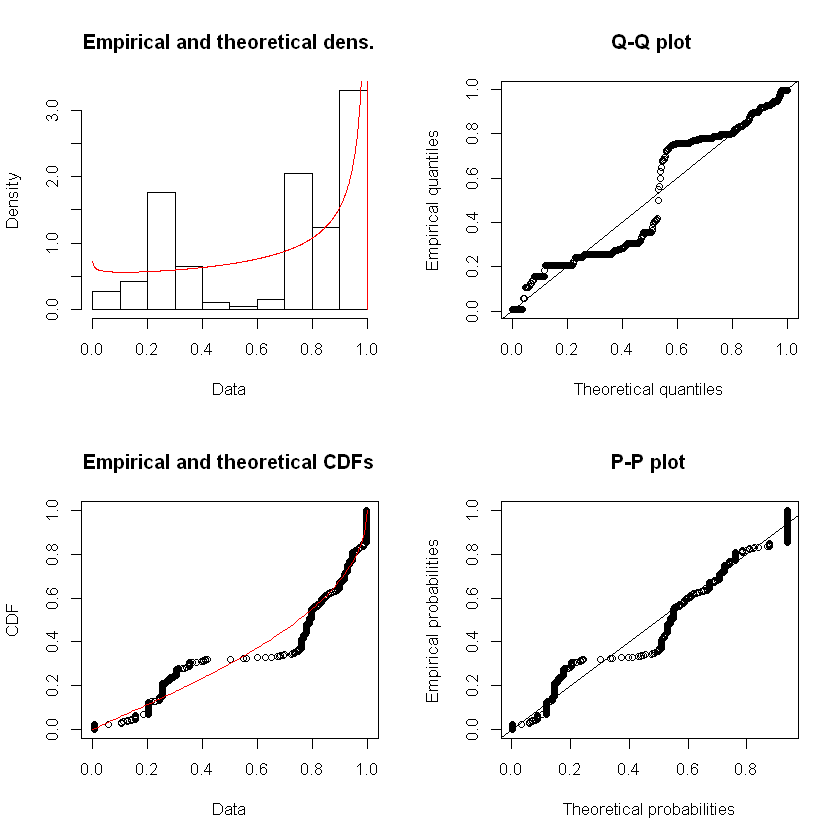

In [113]:
x <- df$IsTransitionMetal_composition_average
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
plot(fb)

# 6) NValance composition average

summary statistics
------
min:  -1.922857   max:  6.27228 
median:  0.05548036 
mean:  2.564103e-11 
estimated sd:  1.000856 
estimated skewness:  1.637832 
estimated kurtosis:  9.921015 

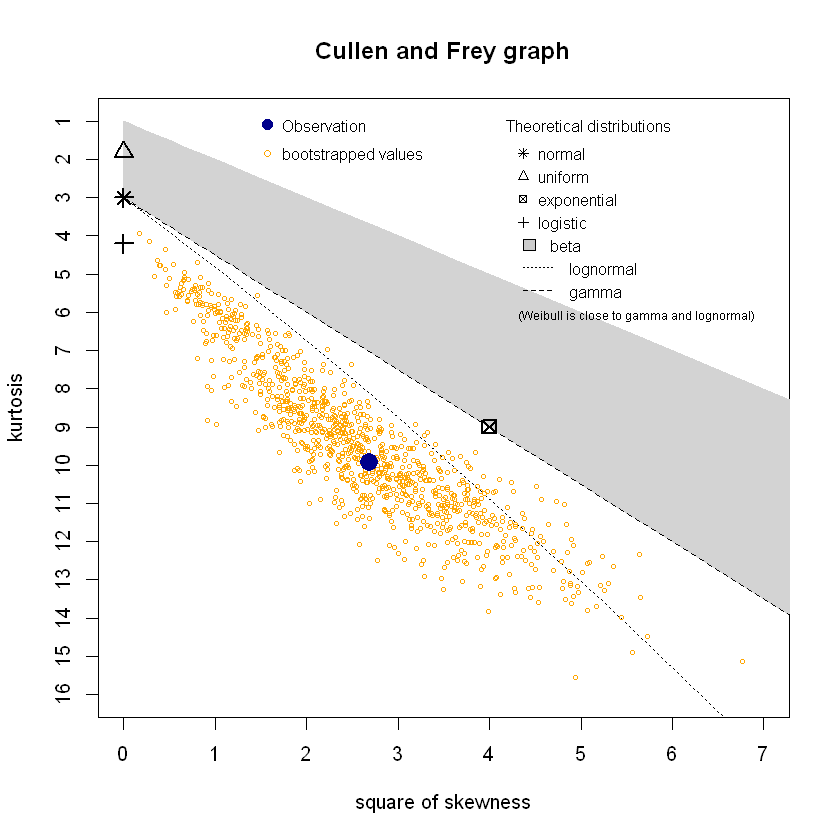

In [53]:
descdist(df$NValance_composition_average, discrete = FALSE,boot=1000)

**fitting to lognormal distribution**

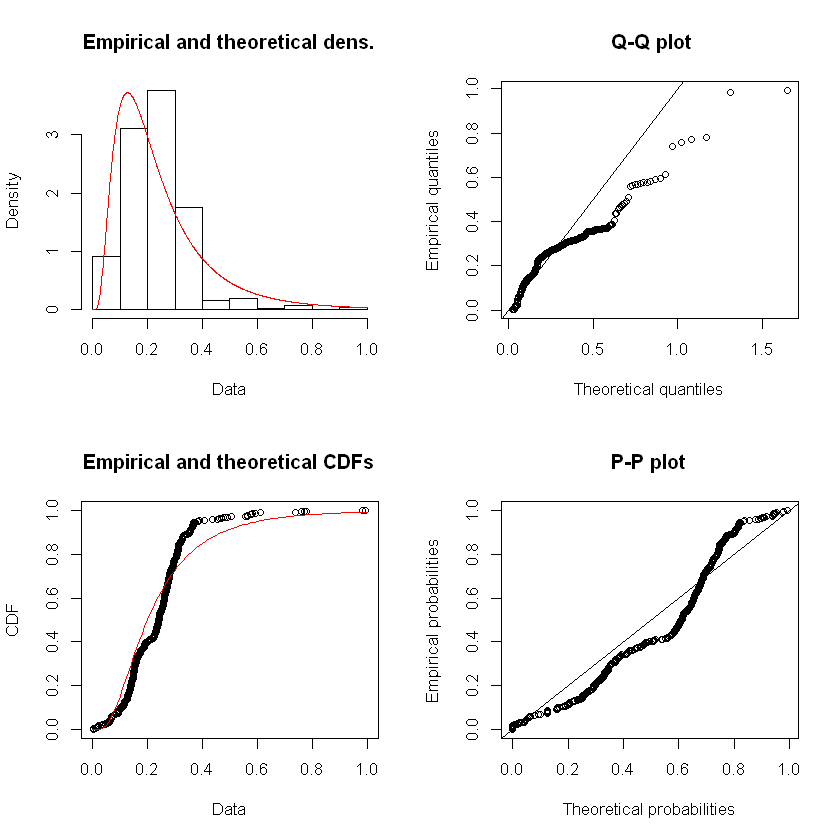

In [114]:
x <- df$NValance_composition_average
fln<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "lnorm")
plot(fln)

# 7) HeatVaporization max value

**cullen frey plot**

summary statistics
------
min:  -1.922857   max:  6.27228 
median:  0.05548036 
mean:  2.564103e-11 
estimated sd:  1.000856 
estimated skewness:  1.637832 
estimated kurtosis:  9.921015 

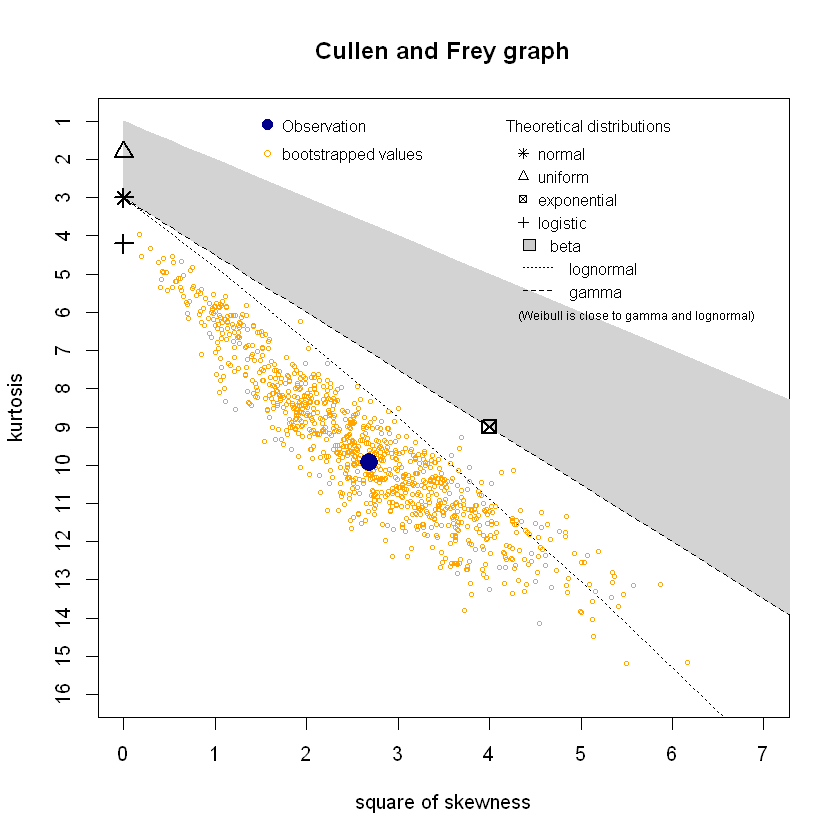

In [54]:
descdist(df$NValance_composition_average, discrete = FALSE,boot=1000)

the observation lies below the lognormal distribution line

**fitting the lognormal distribution**

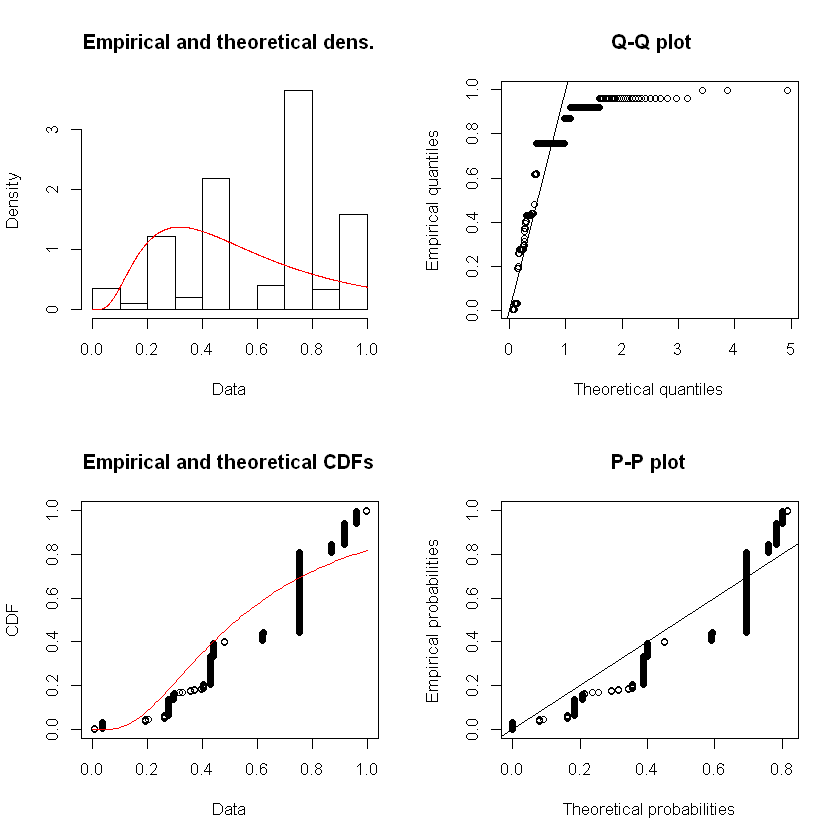

In [116]:
x <- df$HeatVaporization_max_value
fln<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "lnorm")
plot(fln)

# 8) BoilingT difference

**Cullen frey plot**

summary statistics
------
min:  -2.118943   max:  3.247621 
median:  0.1006106 
mean:  -4.444444e-11 
estimated sd:  1.000856 
estimated skewness:  0.7919673 
estimated kurtosis:  5.295467 

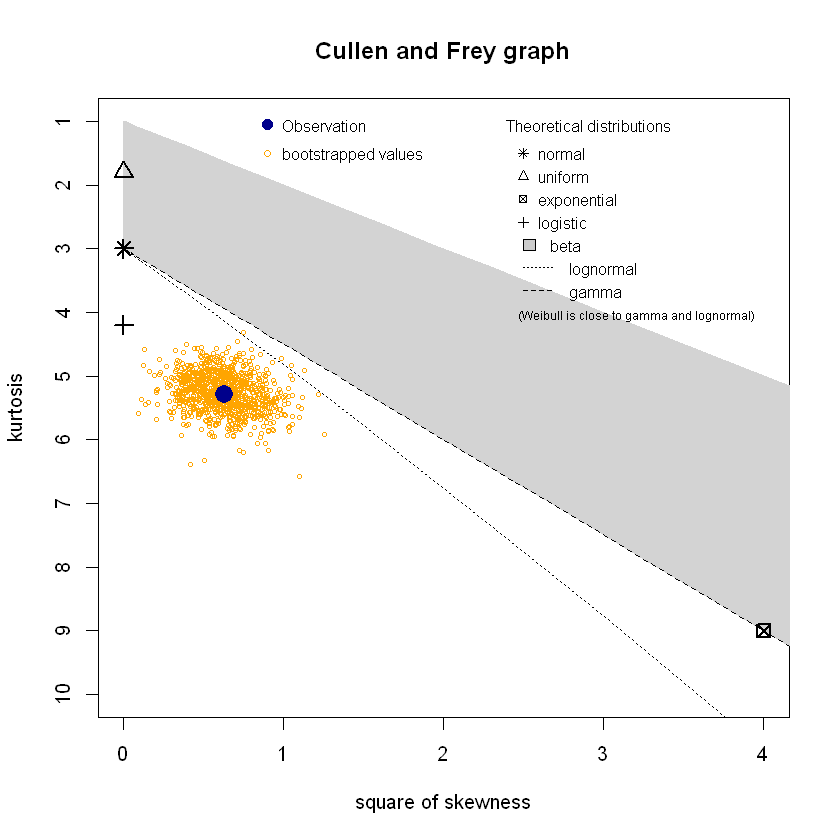

In [55]:
descdist(df$BoilingT_difference, discrete = FALSE,boot=1000)

it's difficult to determine because the observation doesn't really seel to fit any distributions but we will still try lognormal and the logistic distributions

**fitting to distributions**

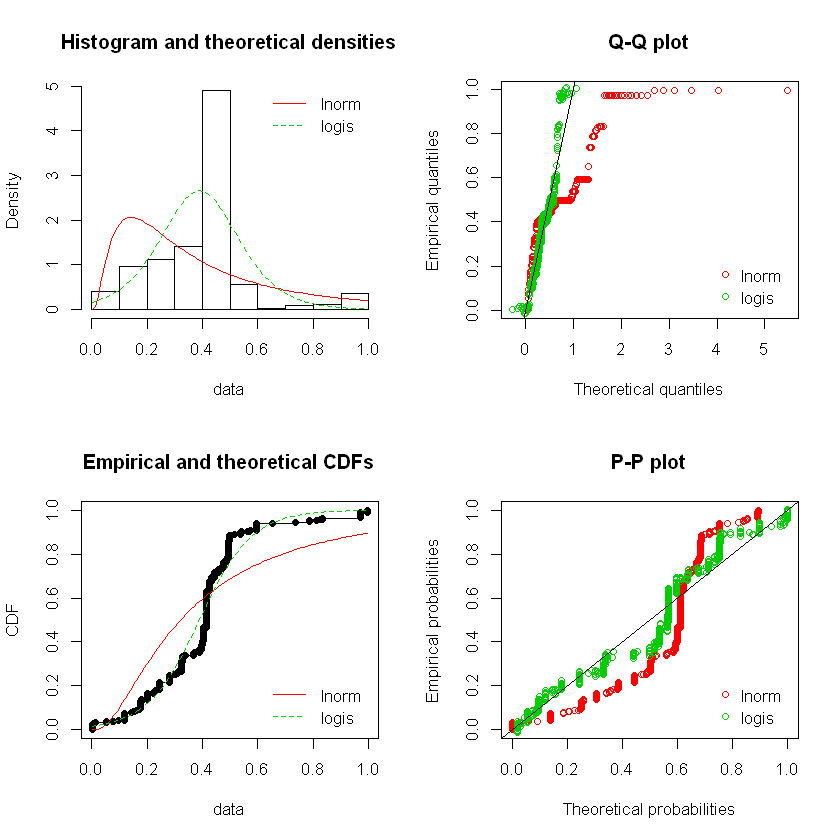

In [103]:
x <- df$BoilingT_difference
fln<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "lnorm")
fllg <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "logis")
par(mfrow = c(2, 2))
plot.legend <- c( "lnorm","logis")
denscomp(list(fln,fllg), legendtext = plot.legend)
qqcomp(list(fln,fllg), legendtext = plot.legend)
cdfcomp(list(fln,fllg), legendtext = plot.legend)
ppcomp(list(fln,fllg), legendtext = plot.legend)

judging from the observations the LOGISTIC DIST seems to fit better

# 9) HeatVaporization difference

**cullen frey plot**

summary statistics
------
min:  -1.844594   max:  3.084747 
median:  0.1760586 
mean:  -4.273503e-11 
estimated sd:  1.000856 
estimated skewness:  0.8393281 
estimated kurtosis:  4.674056 

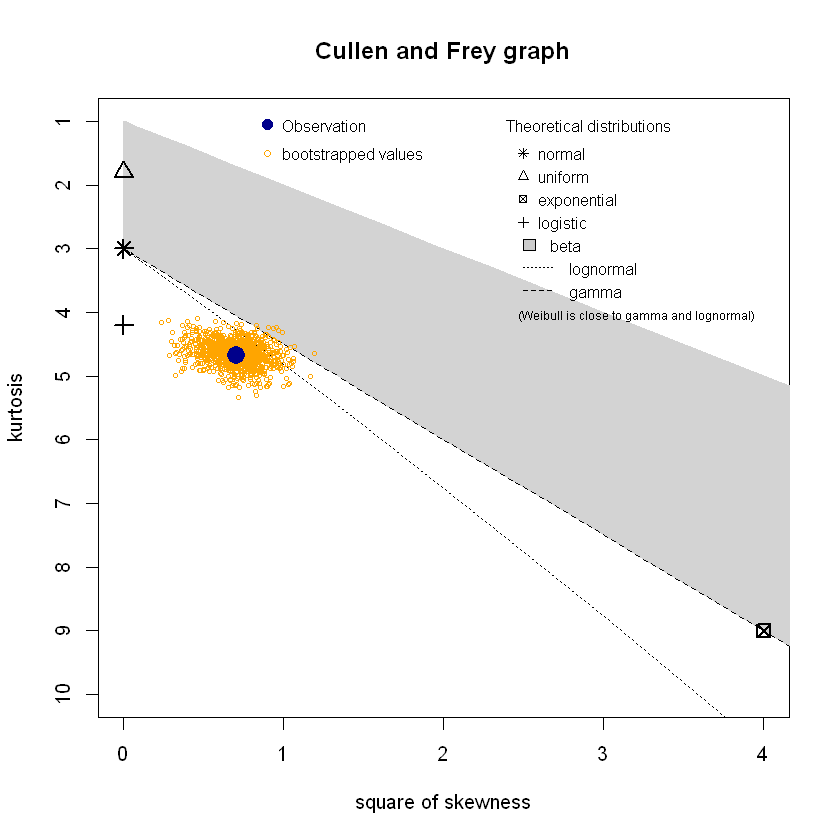

In [56]:
descdist(df$HeatVaporization_difference, discrete = FALSE,boot=1000)

judging by the graph it's better if we go with the lognormal distribution

**fitting to lognormal distribution**

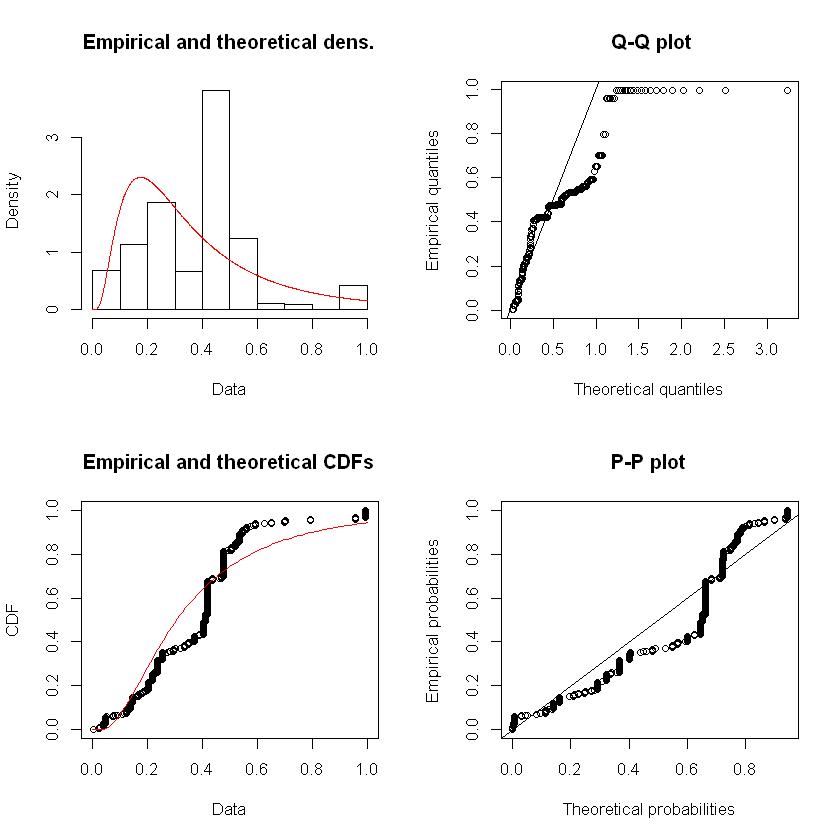

In [97]:
x <- df$HeatVaporization_difference
fln<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "lnorm")
plot(fln)

# 10) MeltingT_difference

**Cullen frey plot**

summary statistics
------
min:  -1.435136   max:  3.822408 
median:  -0.2355999 
mean:  -8.888888e-11 
estimated sd:  1.000856 
estimated skewness:  1.862502 
estimated kurtosis:  7.748327 

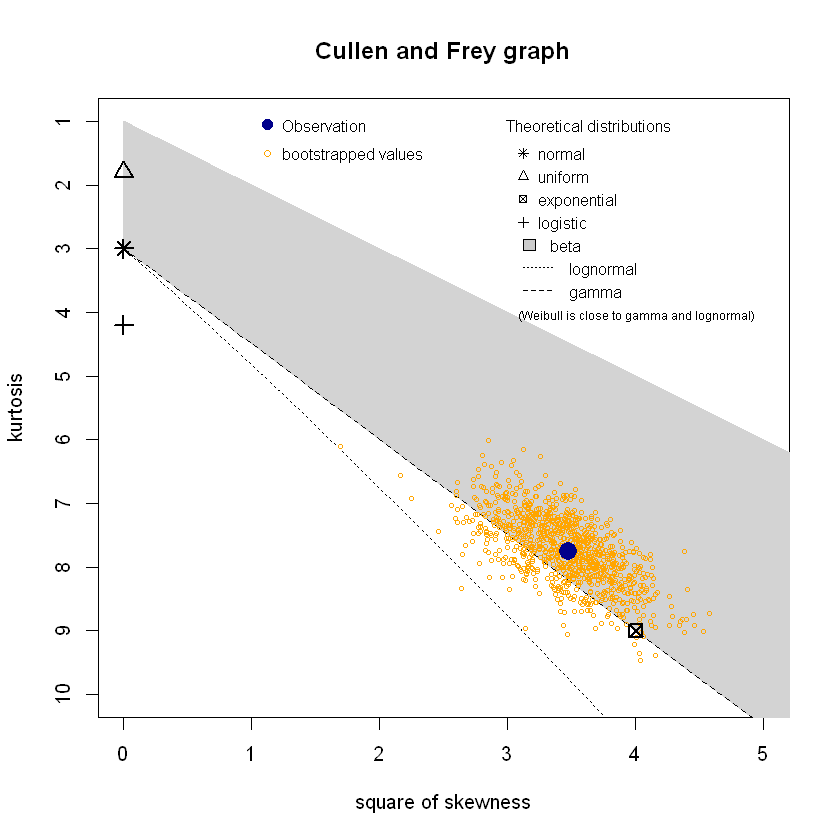

In [57]:
descdist(df$MeltingT_difference, discrete = FALSE,boot=1000)

observation lies in the beta region, bootstrapped values are hitting the gamma distribution line

**fitting the distributions**

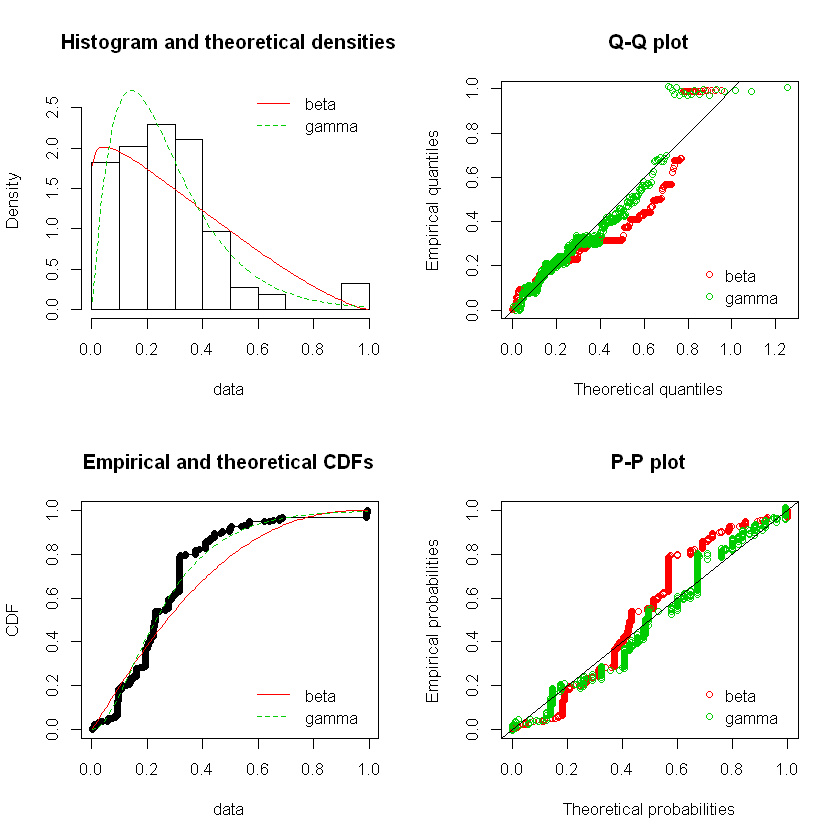

In [95]:
x <- df$MeltingT_difference
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
fg <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "gamma")
par(mfrow = c(2, 2))
plot.legend <- c( "beta","gamma")
denscomp(list(fb,fg), legendtext = plot.legend)
qqcomp(list(fb,fg), legendtext = plot.legend)
cdfcomp(list(fb,fg), legendtext = plot.legend)
ppcomp(list(fb,fg), legendtext = plot.legend)

**choosing the best possible distribution**

In [96]:
fb$aic
fg$aic

[1] -295.0287

[1] -497.0252

GAMMA DIST(AIC=-497) is a better fit

# 11) NdValence_difference

**Cullen frey plot**

summary statistics
------
min:  -1.654388   max:  1.005911 
median:  0.4738515 
mean:  5.128207e-11 
estimated sd:  1.000856 
estimated skewness:  -0.6532023 
estimated kurtosis:  1.898246 

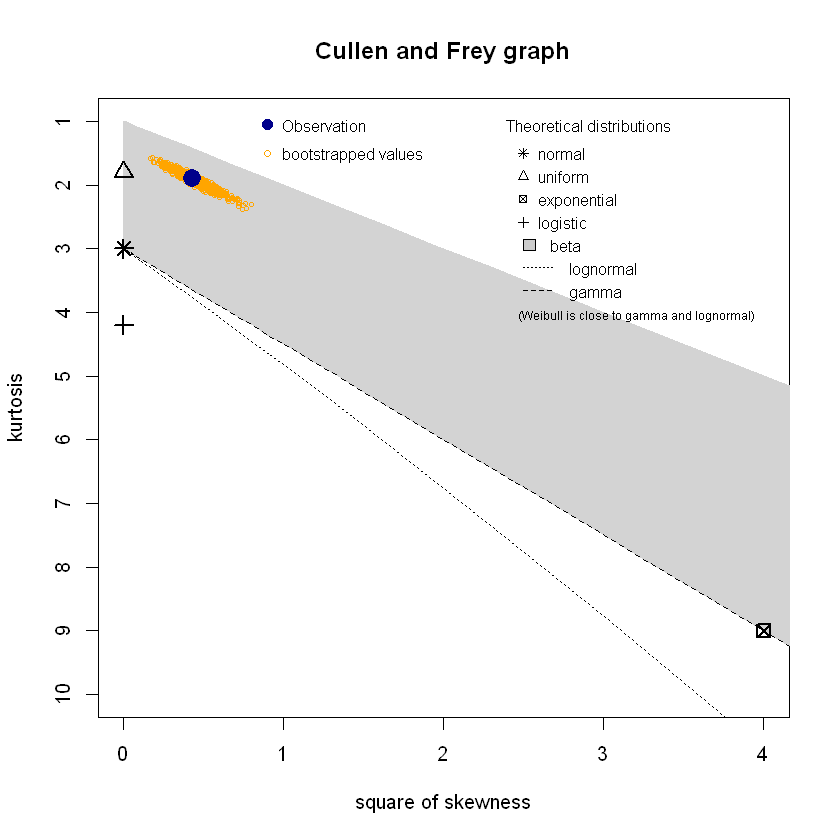

In [58]:
descdist(df$NdValence_difference, discrete = FALSE,boot=1000)

**fitting the beta distribution**

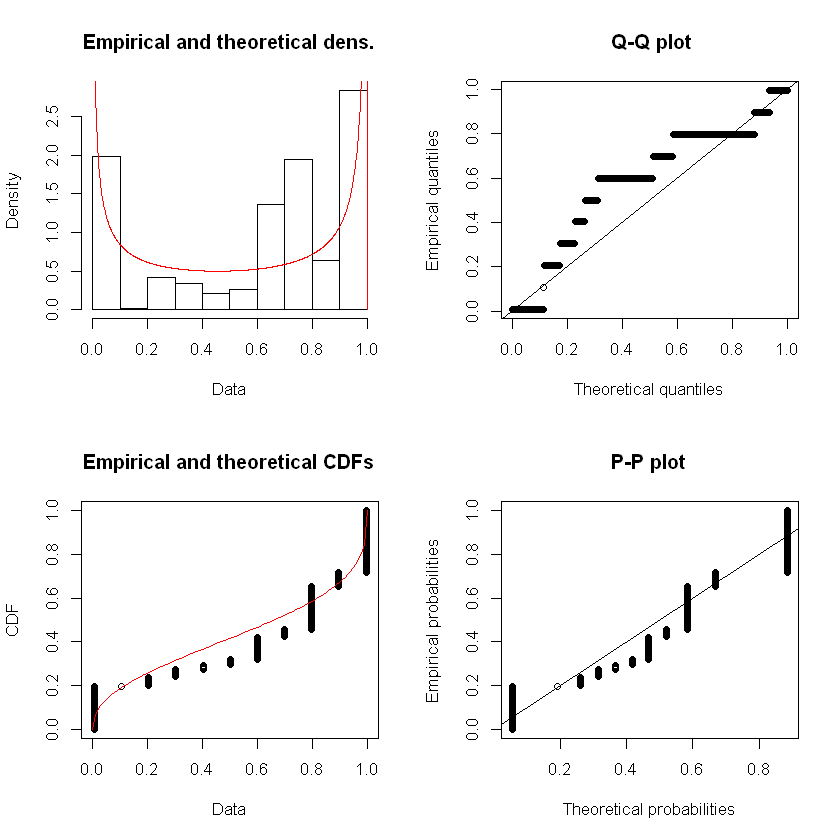

In [93]:
x <- df$NdValence_difference
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
plot(fb)

# 12) NsUnfilled difference

**cullen frey plot**

summary statistics
------
min:  -1.165706   max:  0.8578491 
median:  0.8578491 
mean:  -2.051282e-10 
estimated sd:  1.000856 
estimated skewness:  -0.3086491 
estimated kurtosis:  1.088718 

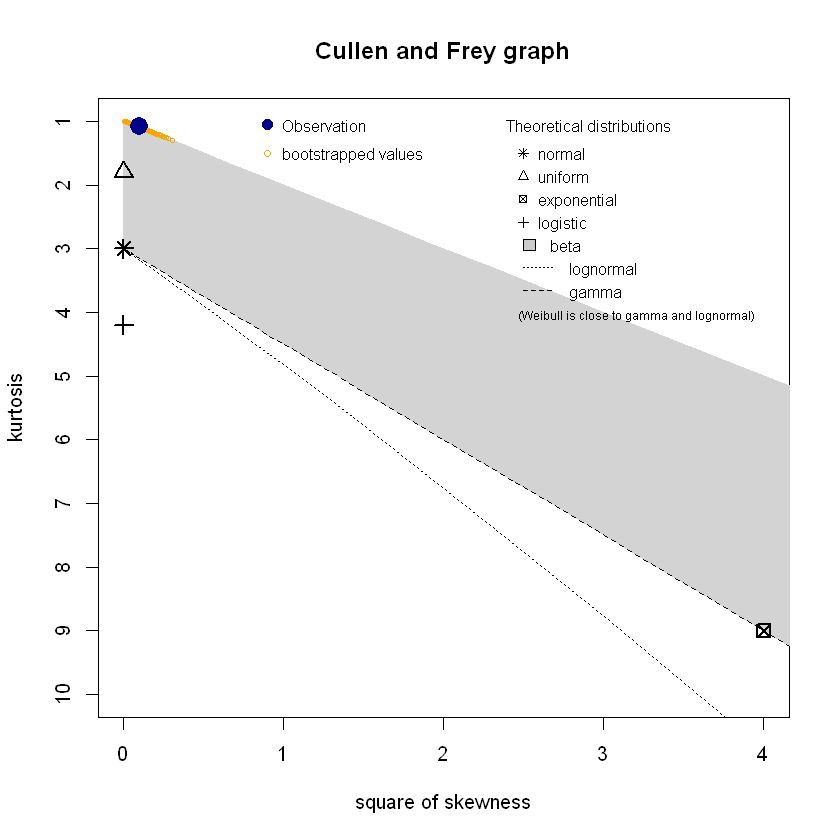

In [59]:
descdist(df$NsUnfilled_difference, discrete = FALSE,boot=1000)

looking at the observation we have no choice but to go with the beta distribution

**fitting the beta distribution**

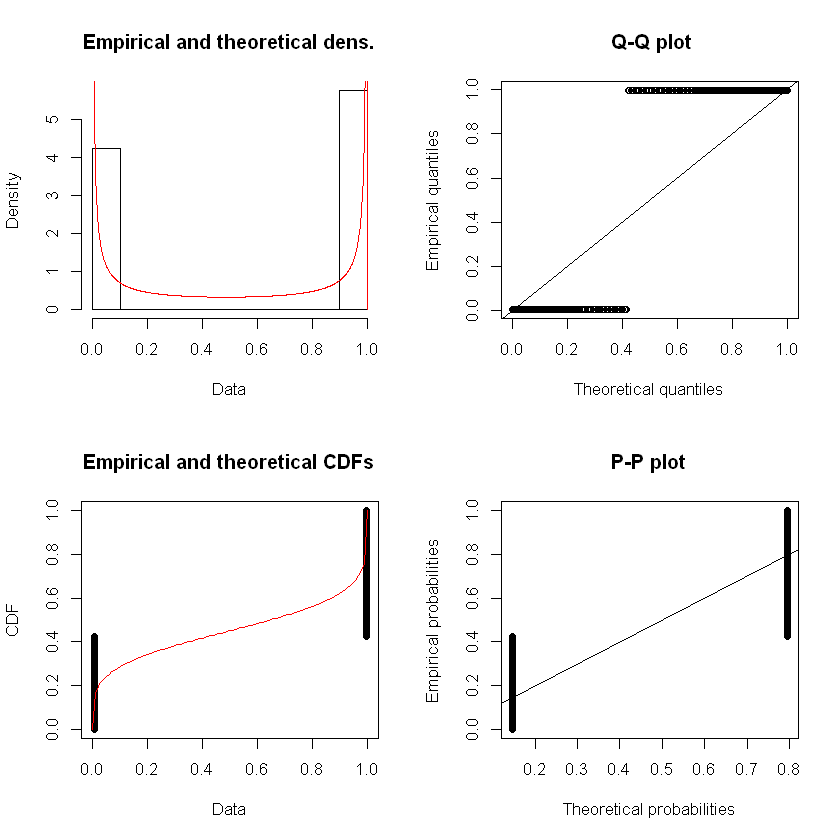

In [92]:
x <- df$NsUnfilled_difference
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
plot(fb)

# 13) valence difference

**cullen frey plot**

summary statistics
------
min:  -1.745035   max:  2.274041 
median:  0.2645033 
mean:  -6.666671e-11 
estimated sd:  1.000856 
estimated skewness:  -0.3193563 
estimated kurtosis:  2.351189 

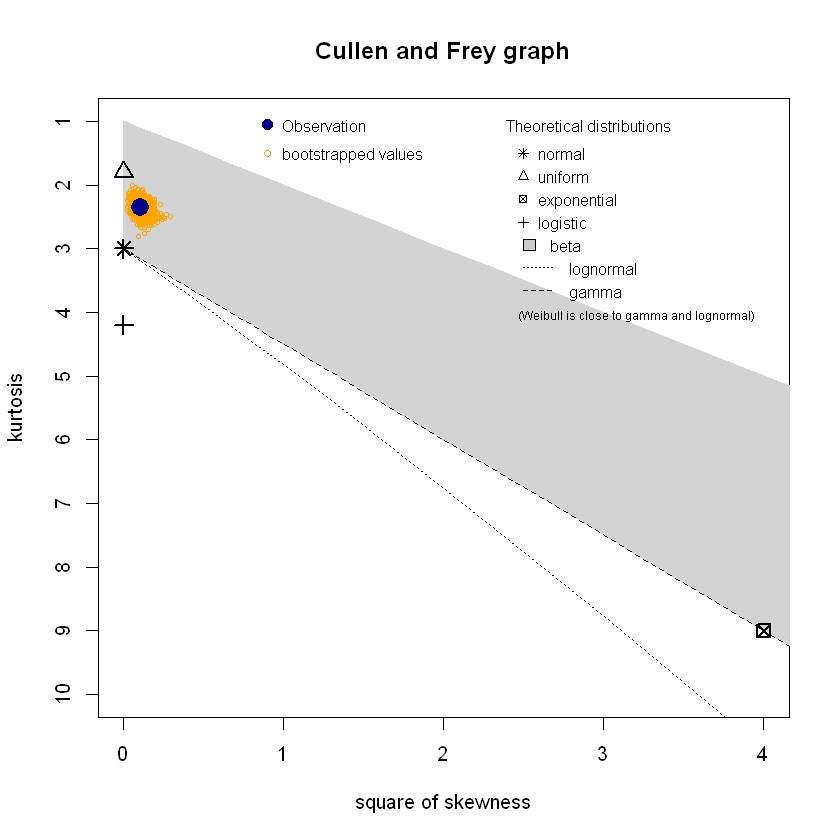

In [60]:
descdist(df$valence_difference, discrete = FALSE,boot=1000)

the observation may fit to normal,uniform or beta distribution

**fitting the distributions**

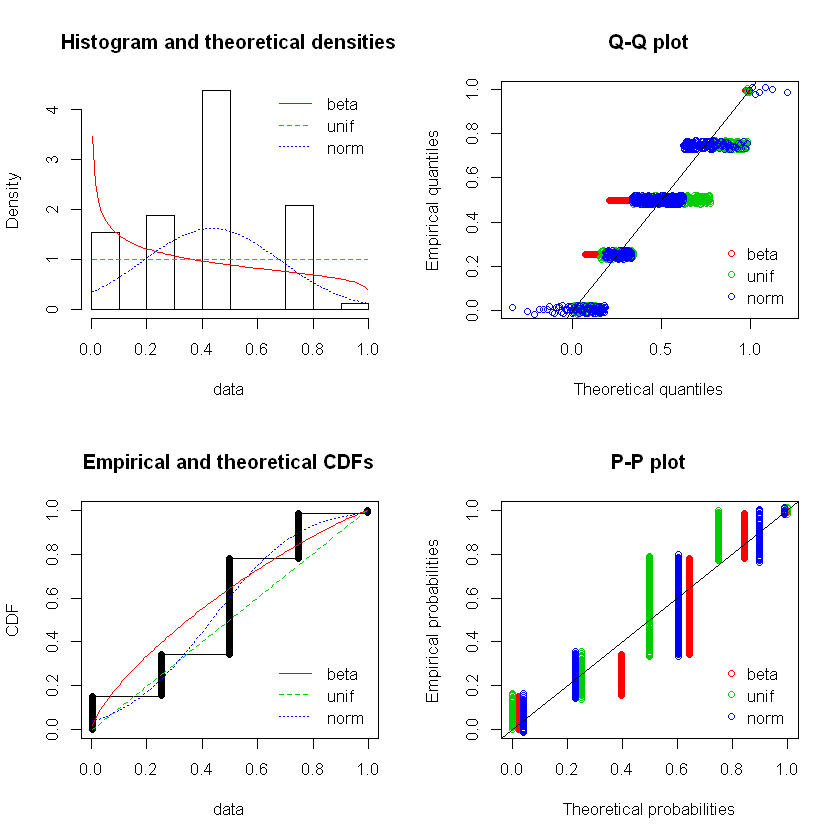

In [90]:
x <- df$valence_difference
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
fu <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "unif")
fn <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "norm")
par(mfrow = c(2, 2))
plot.legend <- c( "beta","unif","norm")
denscomp(list(fb, fu,fn), legendtext = plot.legend)
qqcomp(list(fb, fu,fn), legendtext = plot.legend)
cdfcomp(list(fb, fu,fn), legendtext = plot.legend)
ppcomp(list(fb, fu,fn), legendtext = plot.legend)

**choosing the best fit distribution**

In [91]:
fb$aic
fu$aic
fn$aic

[1] -97.57405

[1] -7.641887

[1] 24.98522

comparing the aic values we see that BETA DIST is best fit for the feature

# 14) Site1 Density

**cullen frey plot**

summary statistics
------
min:  -1.468652   max:  4.127357 
median:  0.09502333 
mean:  -1.094017e-10 
estimated sd:  1.000856 
estimated skewness:  0.4281156 
estimated kurtosis:  4.388066 

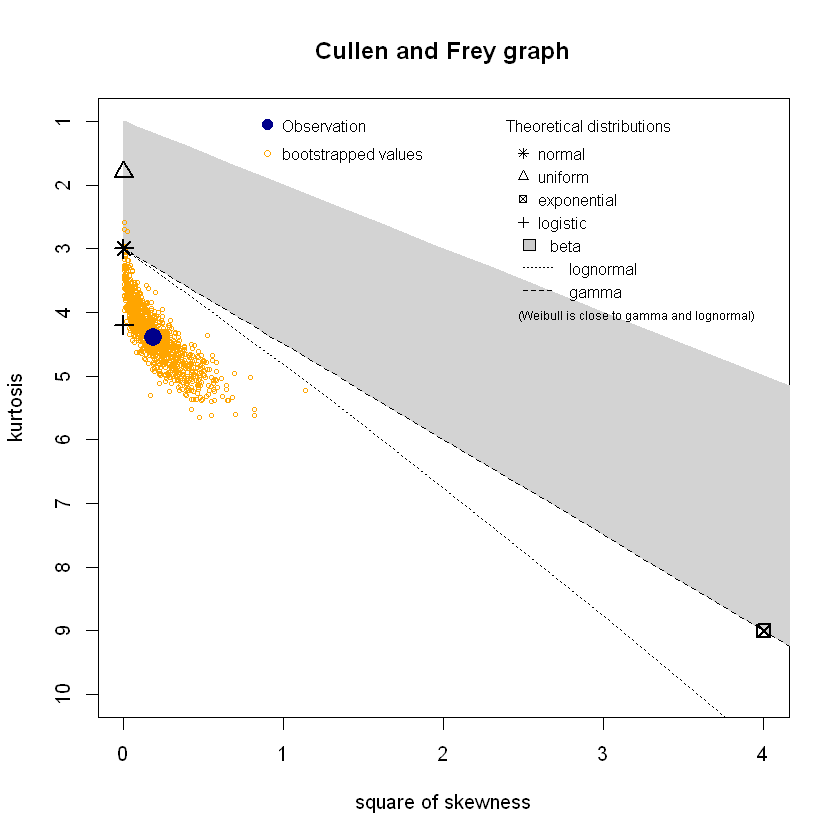

In [61]:
descdist(df$Site1_Density, discrete = FALSE,boot=1000)

observation lies near logistic distribution

**fitting the logistic distribution**

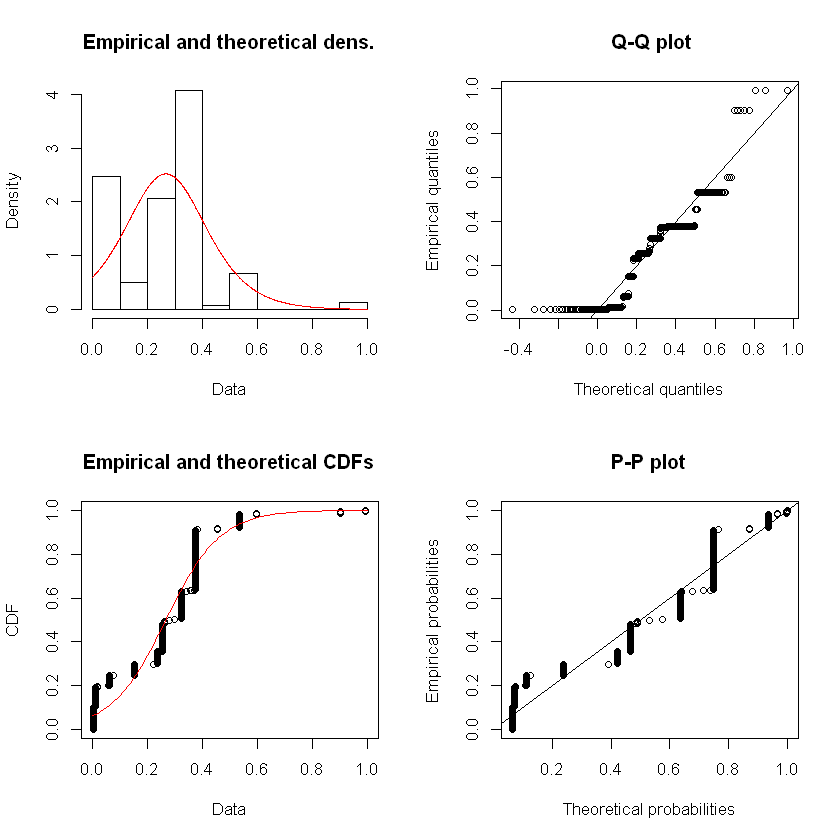

In [89]:
x <- df$Site1_Density
fllg<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "logis")
plot(fllg)

# 15) Site1 HeatCapacityMass

**cullen frey plot**

summary statistics
------
min:  -1.279271   max:  4.995841 
median:  -0.3320846 
mean:  -5.982907e-11 
estimated sd:  1.000856 
estimated skewness:  1.750919 
estimated kurtosis:  7.361955 

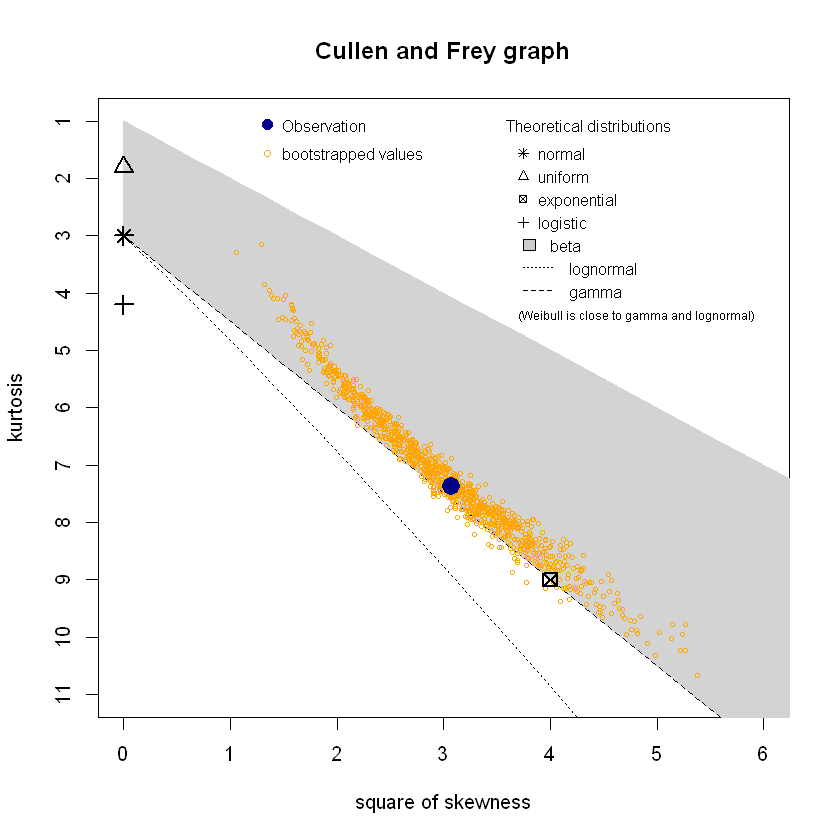

In [62]:
descdist(df$Site1_HeatCapacityMass, discrete = FALSE,boot=1000)

the observation clearly lies in the gamma distribution line

**fitting gamma distribution**

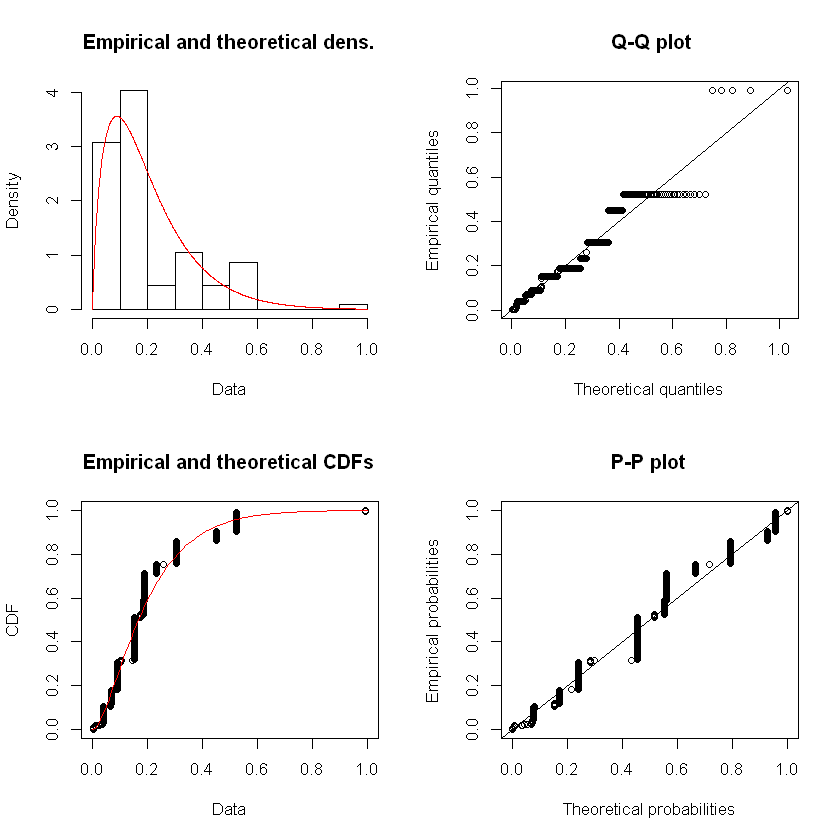

In [86]:
x <- df$Site1_HeatCapacityMass
fg<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "gamma")
plot(fg)

# 17) Site1 HeatFusion

**cullen frey plot**

summary statistics
------
min:  -1.740832   max:  3.664525 
median:  0.05214307 
mean:  -4.444444e-11 
estimated sd:  1.000856 
estimated skewness:  0.3596201 
estimated kurtosis:  2.688689 

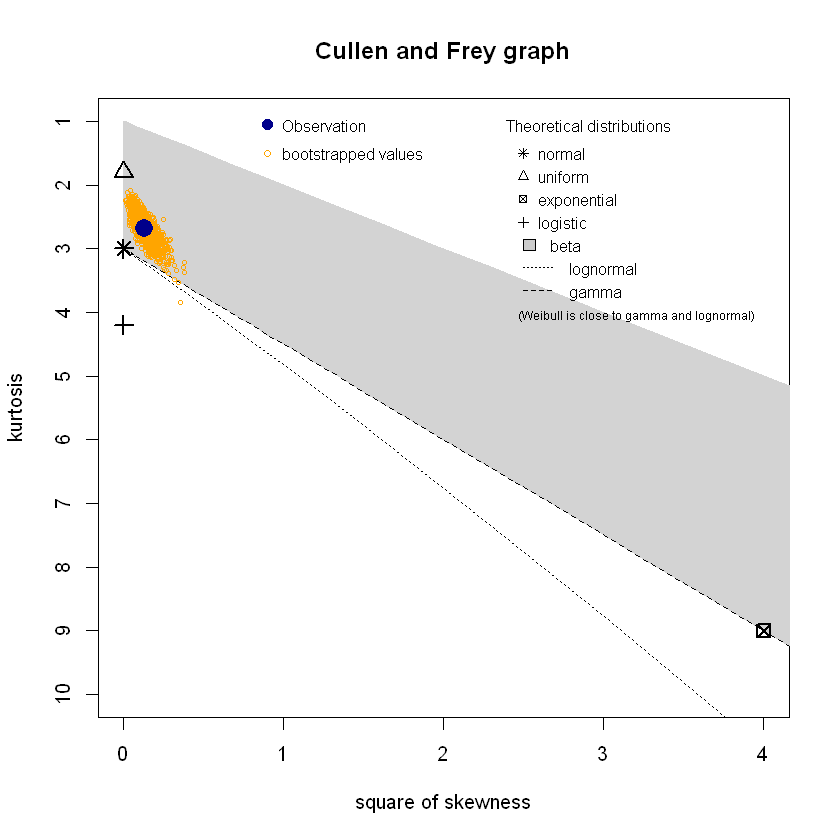

In [63]:
descdist(df$Site1_HeatFusion, discrete = FALSE,boot=1000)

as per the graph the observation is close to uniform and normal distributions,it also lies in the beta region

**fitting distributions**

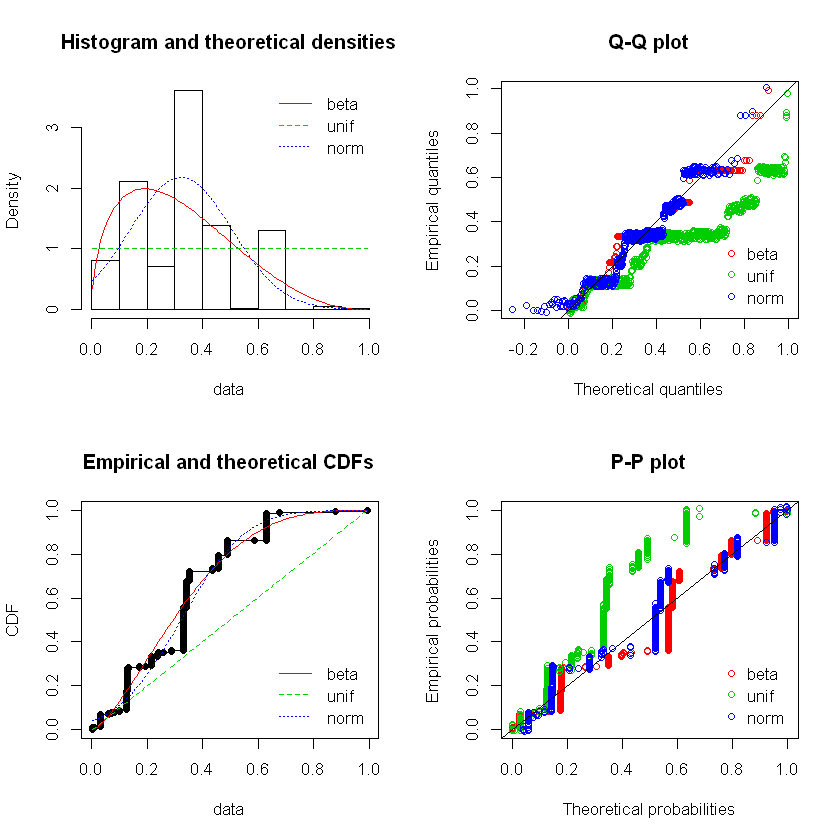

In [84]:
x <- df$Site1_HeatFusion
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
fu <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "unif")
fn <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "norm")
par(mfrow = c(2, 2))
plot.legend <- c( "beta","unif","norm")
denscomp(list(fb, fu,fn), legendtext = plot.legend)
qqcomp(list(fb, fu,fn), legendtext = plot.legend)
cdfcomp(list(fb, fu,fn), legendtext = plot.legend)
ppcomp(list(fb, fu,fn), legendtext = plot.legend)

In [85]:
fb$aic
fu$aic
fn$aic

[1] -363.5578

[1] -7.641887

[1] -321.7305

1. BETA DIST(aic) = -363.557
2. UNIFORM DIST(aic)=-7.64
3. NORMAL DIST(aic)=-321.73

BETA DISTRIBUTION is the best fit

# 18) Site1 IsDBlock

**cullen frey plot**

summary statistics
------
min:  -1.392731   max:  0.718014 
median:  0.718014 
mean:  -3.333333e-10 
estimated sd:  1.000856 
estimated skewness:  -0.6764524 
estimated kurtosis:  1.452285 

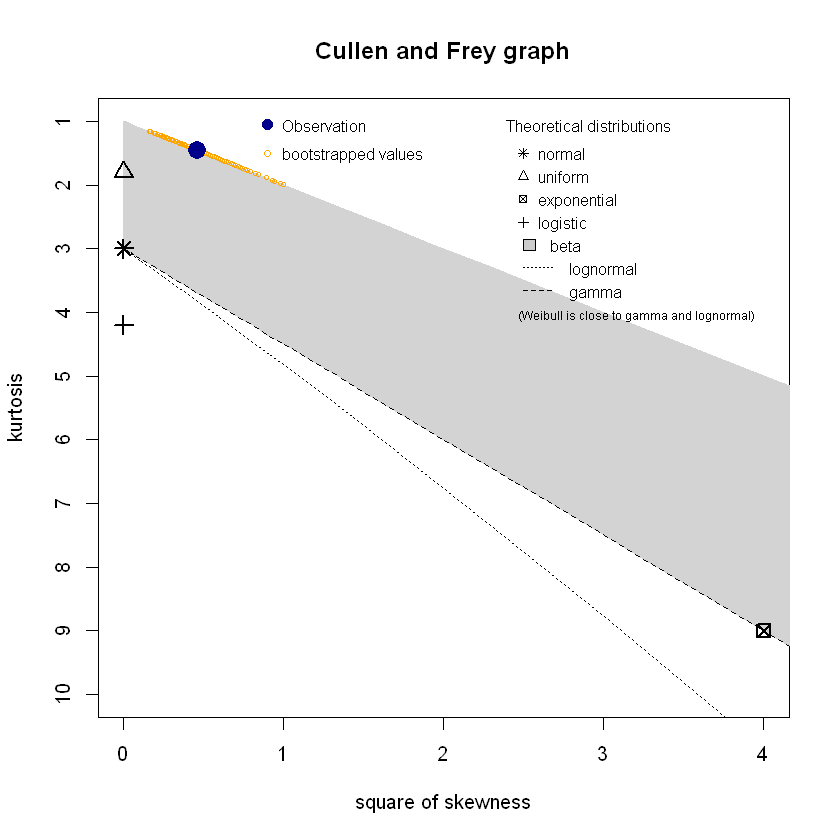

In [64]:
descdist(df$Site1_IsDBlock, discrete = FALSE,boot=1000)

observation lies in the beta region

**fitting beta distribution**

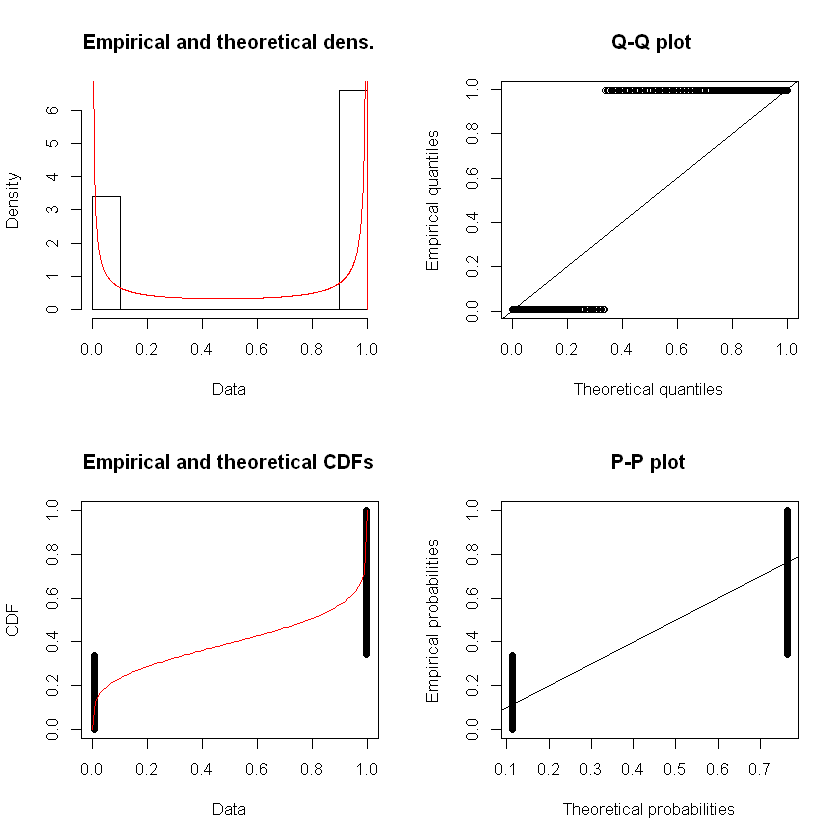

In [83]:
x <- df$Site1_IsDBlock
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
plot(fb)

# 19) Site1 IsTransitionMetal

**cullen frey plot**

summary statistics
------
min:  -1.392731   max:  0.718014 
median:  0.718014 
mean:  -3.333333e-10 
estimated sd:  1.000856 
estimated skewness:  -0.6764524 
estimated kurtosis:  1.452285 

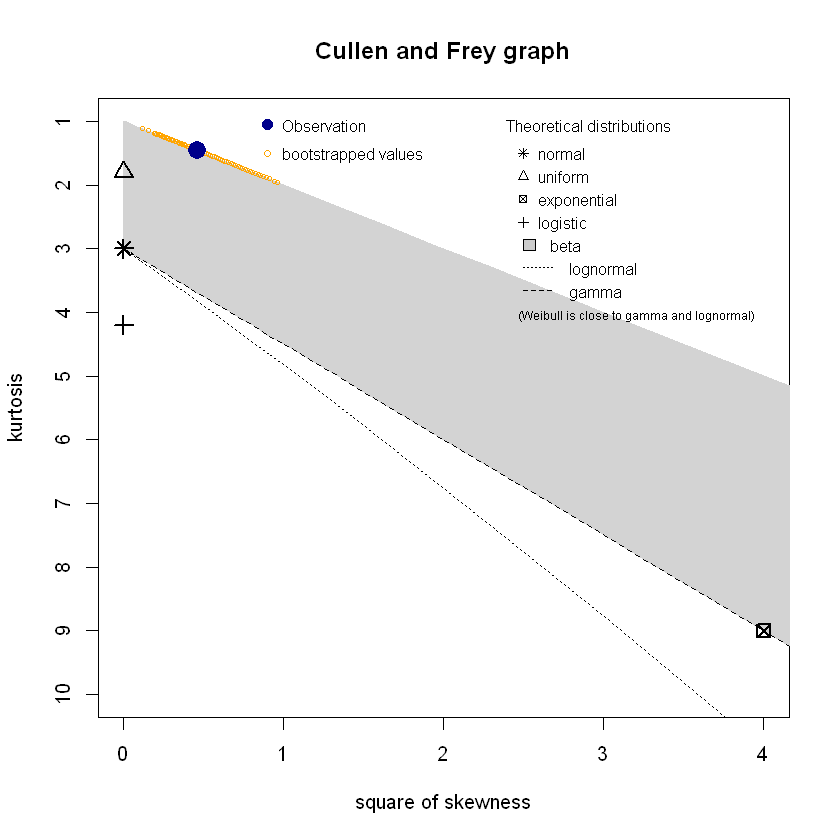

In [65]:
descdist(df$Site1_IsTransitionMetal, discrete = FALSE,boot=1000)

the observation lies in the beta region 

**fitting the beta distribution**

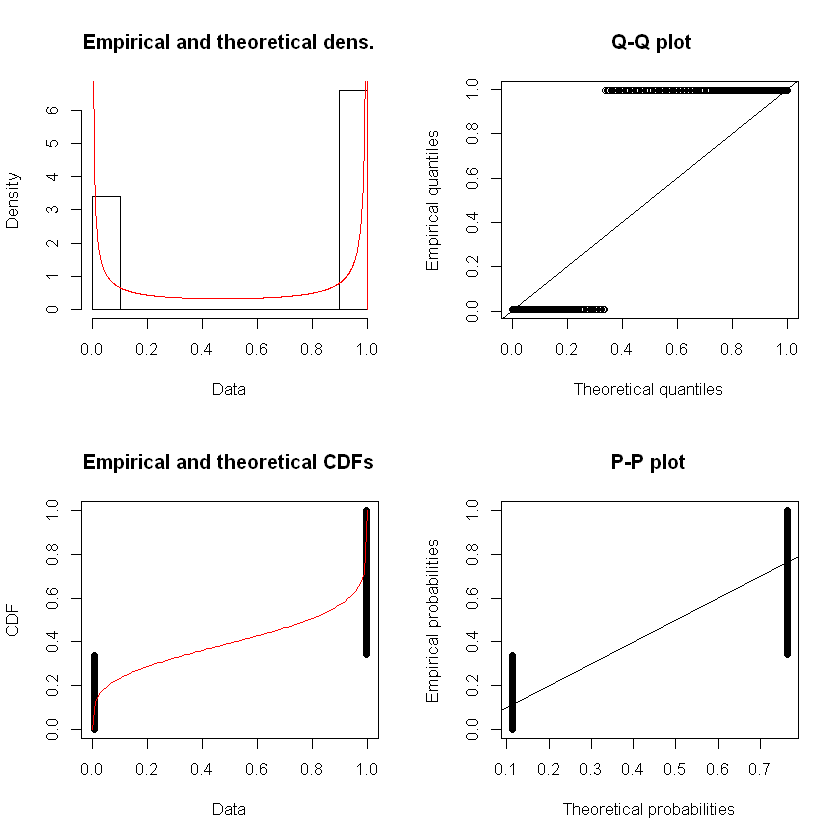

In [82]:
x <- df$Site1_IsTransitionMetal
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
plot(fb)

# 20) Site1 NdValence

**cullen frey plot**

summary statistics
------
min:  -1.106354   max:  1.31768 
median:  -0.6215474 
mean:  9.74359e-11 
estimated sd:  1.000856 
estimated skewness:  0.2285465 
estimated kurtosis:  1.335521 

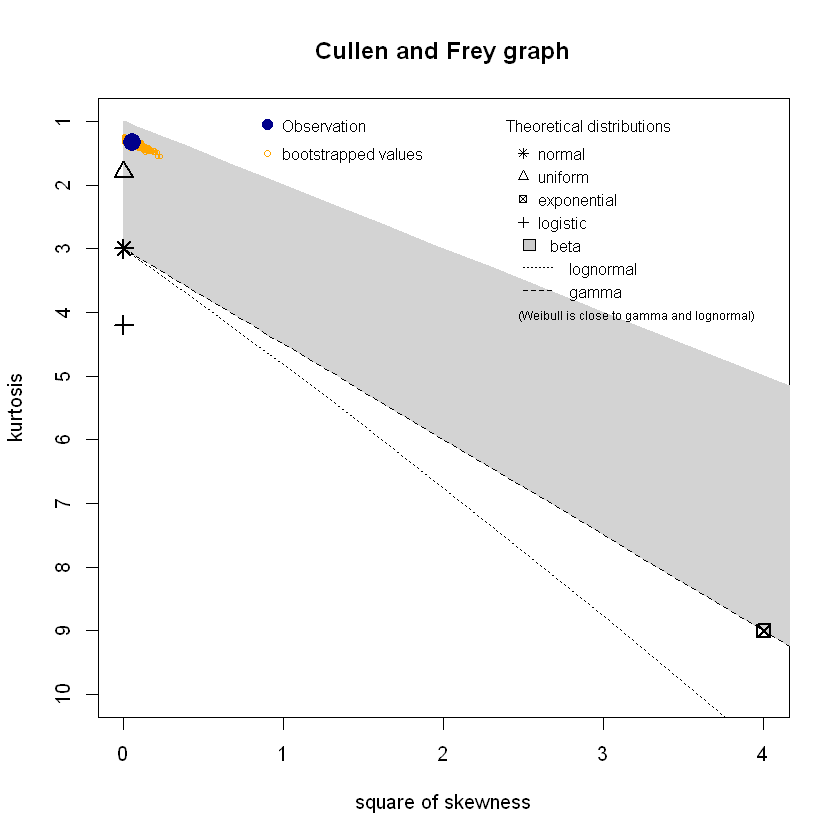

In [66]:
descdist(df$Site1_NdValence, discrete = FALSE,boot=1000)

the observation falls in the beta range

**fitting the distributions**

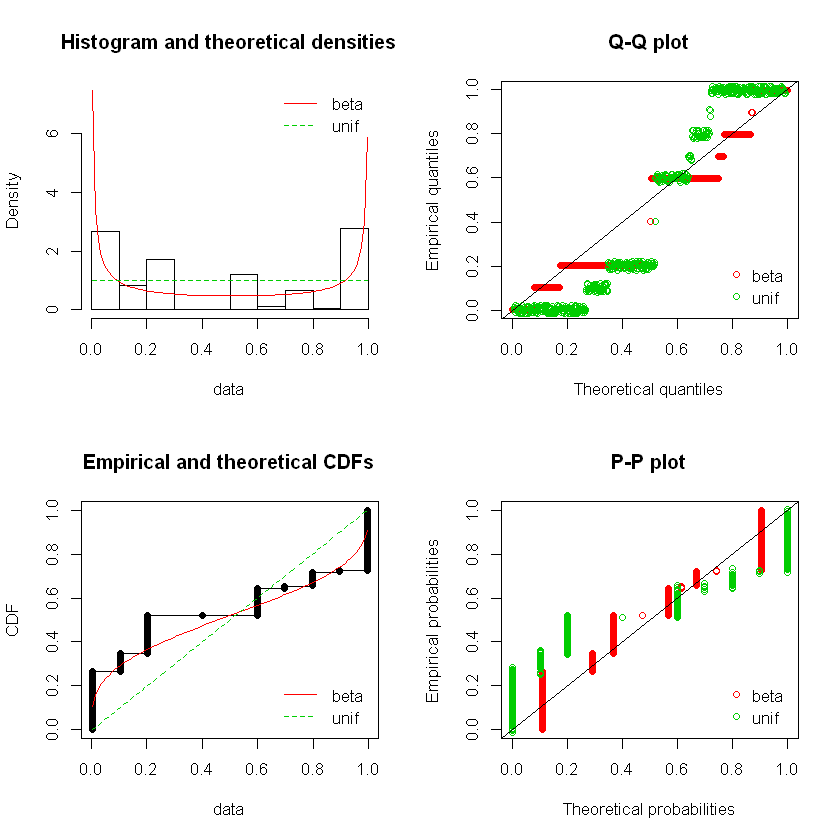

In [78]:
x <- df$Site1_NdValence
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
fu <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "unif")
par(mfrow = c(2, 2))
plot.legend <- c( "beta","unif")
denscomp(list(fb, fu), legendtext = plot.legend)
qqcomp(list(fb, fu), legendtext = plot.legend)
cdfcomp(list(fb, fu), legendtext = plot.legend)
ppcomp(list(fb, fu), legendtext = plot.legend)

**finalizing the distribution**

In [79]:
fb$aic
fu$aic

[1] -937.2675

[1] -7.641887

BETA DIST(AIC) has a lower value therefore it is a better fit 

# 21) Site1 SpecificHeatCapacity

**cullen frey plot**

summary statistics
------
min:  -1.280819   max:  4.9969 
median:  -0.3300981 
mean:  -7.521366e-11 
estimated sd:  1.000856 
estimated skewness:  1.743029 
estimated kurtosis:  7.352229 

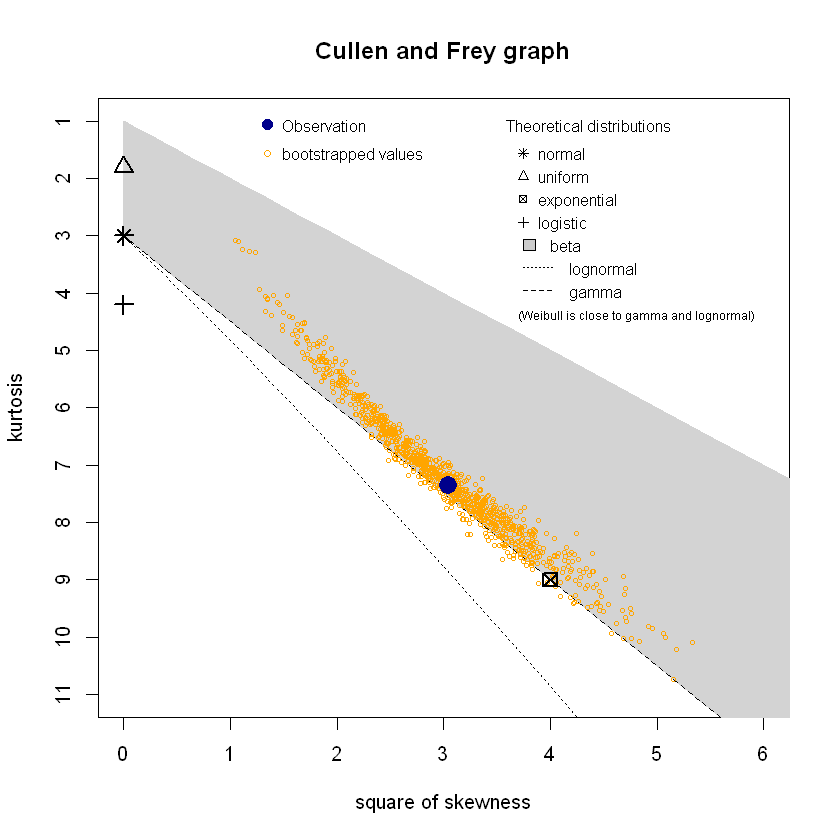

In [67]:
descdist(df$Site1_SpecificHeatCapacity, discrete = FALSE,boot=1000)

**fitting the distributions**

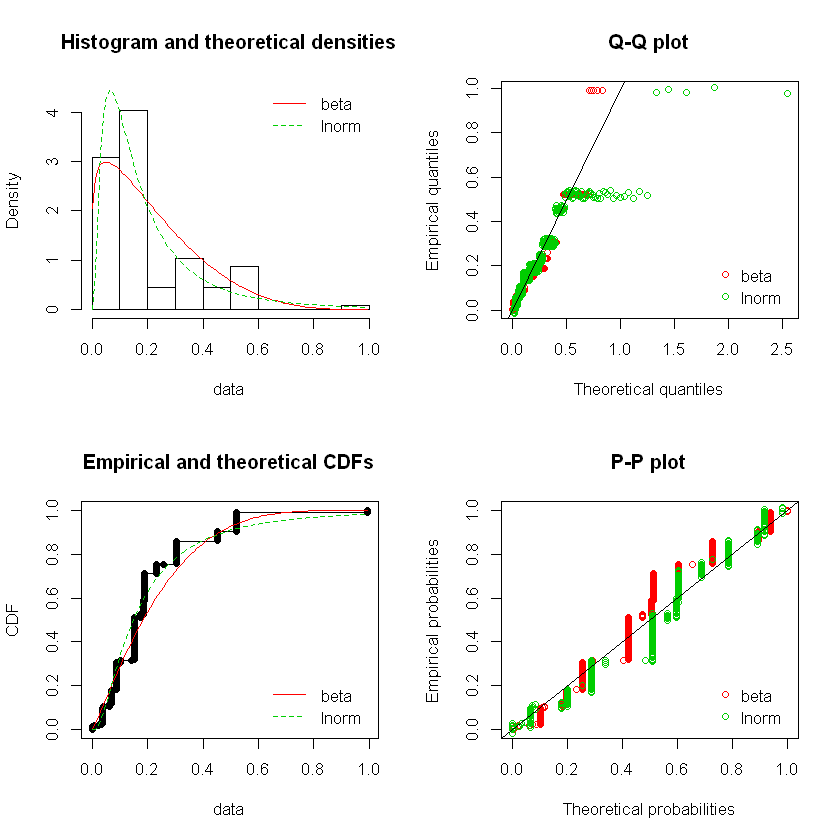

In [75]:
x <- df$Site1_SpecificHeatCapacity
fb<- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "beta")
fln <- fitdist((x - min(x)*1.01) / (max(x) * 1.01 - min(x) * 1.01), "lnorm")
par(mfrow = c(2, 2))
plot.legend <- c( "beta","lnorm")
denscomp(list(fb, fln), legendtext = plot.legend)
qqcomp(list(fb, fln), legendtext = plot.legend)
cdfcomp(list(fb, fln), legendtext = plot.legend)
ppcomp(list(fb, fln), legendtext = plot.legend)

**finalizing the distribution**

In [77]:
fb$aic
fln$aic

[1] -658.9662

[1] -680.1758

LNORM DIST(AIC)=-680.96 which is lower and therefore is a better fit